In [1]:
# kaggle dataset link: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('dataset.csv',index_col=0)
df.shape

(114000, 20)

In [4]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [7]:
print(f'there are {df.isnull().sum().sum()} missing values in the dataset')
print(f'there are {df.duplicated().sum()} duplicated values in the dataset')
print('getting rid of missing values and duplicated values')
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print(f'there are {df.isnull().sum().sum()} missing values in the dataset')
print(f'there are {df.duplicated().sum()} duplicated values in the dataset')

there are 3 missing values in the dataset
there are 450 duplicated values in the dataset
getting rid of missing values and duplicated values
there are 0 missing values in the dataset
there are 0 duplicated values in the dataset


In [8]:
print(f'track_id is unique: {df.track_id.is_unique}')
print(f'there are {df.shape[0]} rows in the dataset, and {df.track_id.nunique()} unique track_id')

track_id is unique: False
there are 113549 rows in the dataset, and 89740 unique track_id


In [9]:
duplicate_track_ids = df[df.duplicated(subset='track_id', keep=False)]['track_id']
df[df.track_id.isin(duplicate_track_ids)].sort_values(by='track_id').head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15008,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,1,-6.644,0,0.1070,0.31600,0.000001,0.1170,0.406,143.064,4,chill
102769,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,1,-6.644,0,0.1070,0.31600,0.000001,0.1170,0.406,143.064,4,soul
85237,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.01940,0.088100,0.3290,0.700,183.571,1,punk-rock
99978,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.01940,0.088100,0.3290,0.700,183.571,1,ska
2105,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,alt-rock


In [10]:
# it seems like there duplicate track_ids, because they belong to different track_genre
# we want to make sure that this is the case, so we will check if there are any duplicate track_ids with the same track_genre
duplicate_track_genre = df.groupby(['track_id', 'track_genre']).size()
duplicate_track_genre = duplicate_track_genre[duplicate_track_genre > 1]
print(f'there are {duplicate_track_genre.shape[0]} track_ids with duplicate track_genre')
print('so we can conclude that the duplicate track_ids belong to different track_genre')

there are 0 track_ids with duplicate track_genre
so we can conclude that the duplicate track_ids belong to different track_genre


In [11]:
from utils import get_ticks, plot_on_bars, config_plot

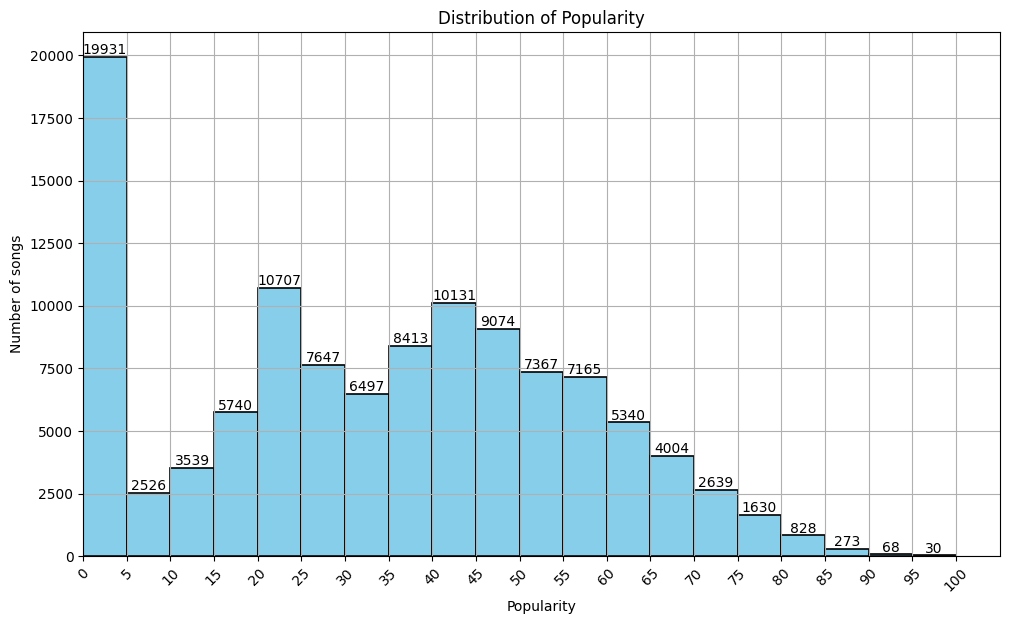

In [12]:
plt.figure(figsize=(10, 6))
ticks=get_ticks(20, df['popularity'])
# Plotting the histogram of popularity
bars = plt.hist(df['popularity'], bins=ticks, color='skyblue', edgecolor='black', linewidth=1.2)
plot_on_bars(plt, bars)
config_plot(plt, 'Distribution of Popularity', 'Popularity', 'Number of songs')
plt.xticks(ticks=ticks, rotation=45)
plt.xlim(left=0)
plt.show()

In [13]:
# Grouping the DataFrame by the 'artists' column and counting the number of occurrences
artist_song_count = df.groupby('artists')['track_id'].count()

# Sorting the result in descending order
artist_song_count_sorted = artist_song_count.sort_values(ascending=False)

# Displaying the top artists with the most songs
print(artist_song_count_sorted.head())  

artists
The Beatles        279
George Jones       260
Stevie Wonder      235
Linkin Park        224
Ella Fitzgerald    221
Name: track_id, dtype: int64


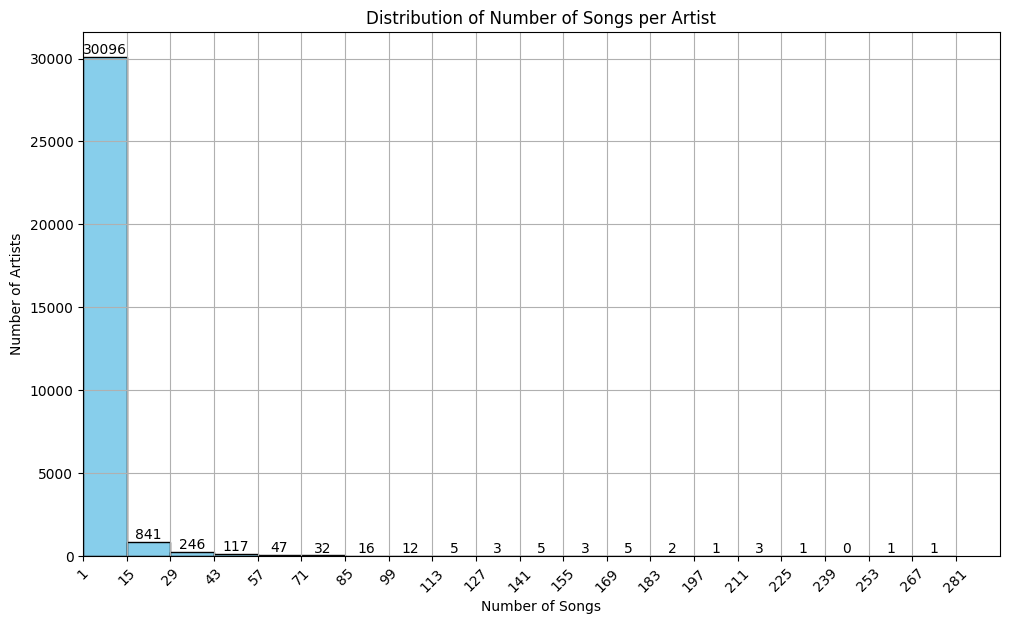

In [14]:
plt.figure(figsize=(10, 6))
ticks=get_ticks(20, artist_song_count_sorted)
bars = plt.hist(artist_song_count_sorted, bins=ticks, color='skyblue', edgecolor='black') 
plot_on_bars(plt, bars)
config_plot(plt, 'Distribution of Number of Songs per Artist', 'Number of Songs', 'Number of Artists')
plt.xticks(ticks=ticks, rotation=45)
plt.xlim(left=1)
plt.show()

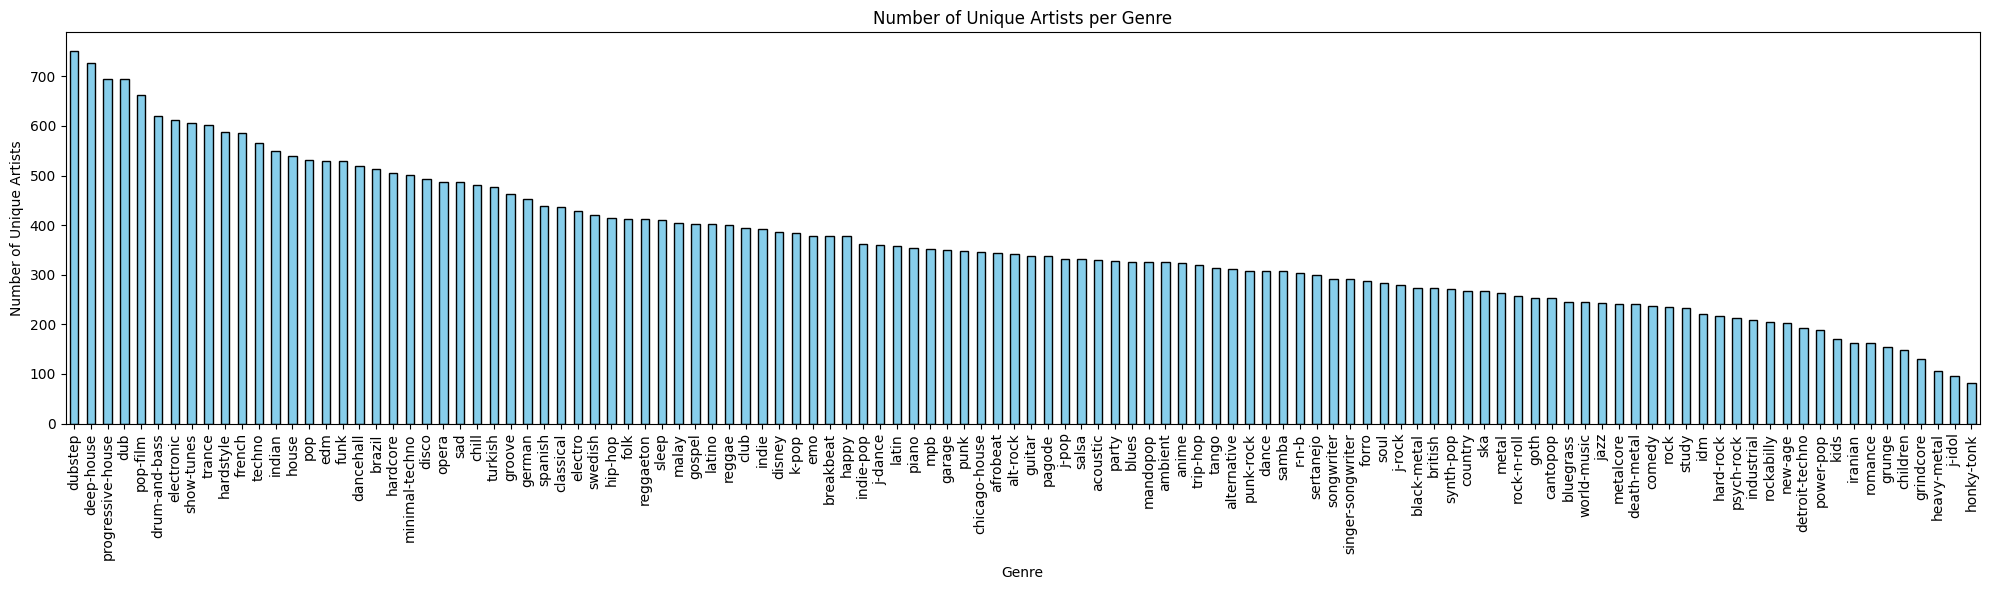

In [15]:
# Grouping the DataFrame by the 'track_genre' column and counting the number of unique artists
genre_artist_count = df.groupby('track_genre')['artists'].nunique().sort_values(ascending=False)

plt.figure(figsize=(20, 6))

# Plotting the bar plot
genre_artist_count.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Genre')
plt.ylabel('Number of Unique Artists')
plt.title('Number of Unique Artists per Genre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
